<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Capstone: Detecting Manufacturing Nonconformities through Live Video Deep Learning Classification<br>

# CNN Training

Note: Please refer to link below for full datasets used for this project:

https://drive.google.com/drive/folders/1epofPcbH1sBWufzDqTgQ5XOqjnhXdR0c?usp=sharing

**Note**<br>
This code was run on a personal computer with the following specifications:<br>

CPU: AMD Ryzen 9 3950X 16-Core Processor 3.49 GHz<br>
RAM: 64 GB Crucial 3200MHz CL16<br>
GPU: NVIDIA RTX3080Ti<br>
Storage: ADATA SX8200 1TB NVME Gen 3<br>

The following was installed to run the code:

cudatoolkit               11.2.2<br>
cudnn                     8.1.0.77<br>
keras                     2.6.0<br>
keras-applications        1.0.8<br>
keras-preprocessing       1.1.2<br>
matplotlib                3.5.1<br>
numpy                     1.19.5<br>
opencv                    4.5.5<br>
pillow                    9.0.1<br>
python                    3.8.12<br>
seaborn                   0.11.2<br>
tensorflow                2.6.3<br>
tensorflow-gpu            2.6.3<br>
tensorflow-hub            0.12.0<br>
tflearn                   0.5.0<br>


In [2]:
#Imports

# comment out the following codes to use GPU instead of CPU for tensorflow (only applicable if tensorflow-gpu is installed)
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="-1"

# Import libraries and modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Image and Video loading imports
import cv2 as cv
from PIL import Image
import pathlib

# Neural Network libraries imports
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.model_selection import train_test_split

# For reproducibility
np.random.seed(42)

# To keep notebook clean
import warnings
warnings.filterwarnings('ignore')

# Base Dataset Model

In [3]:
#loading the validation dataset
IMAGE_SHAPE = (320,240)
data_dir = pathlib.Path('../img/finished_train/')
image_count = len(list(data_dir.glob('*/*.jpg')))
print(f'Image Count = {image_count}')

#setting the list of paths for image files in a dict
images_dict = {
    'pass': list(data_dir.glob('pass/*.jpg')),
    'fail': list(data_dir.glob('fail/*.jpg'))
}

#setting the labels in a dict with integer values (since CNN does not )
labels_dict = {
    'pass': 1,
    'fail': 0,
}

IMAGE_SHAPE = (320,240)

#setting X and y for training
X, y = [], []

for lbl, imgs in images_dict.items():
    for img in imgs:
        img = cv.imread(str(img))
        recolored_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)	#convert from BGR format to RGB format
        resized_img = cv.resize(recolored_img, IMAGE_SHAPE)
        X.append(resized_img)
        y.append(labels_dict[lbl])
        
X = np.array(X)
y = np.array(y)

#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1, stratify=y)

#normalization
X_train_sc = X_train / 255
X_test_sc = X_test / 255

Image Count = 14203


In [ ]:
# Instantiate a CNN.
cnn_model_2 = Sequential()

# Add a convolutional layer.
cnn_model_2.add(Conv2D(filters=16, # number of filters
                       padding='same',
                       kernel_size=(3,3),      # height/width of filter
                       activation='relu',      # activation function 
                       input_shape=(240,320,3))) # shape of input (image)

# Add a pooling layer.
cnn_model_2.add(MaxPooling2D(pool_size=(2,2))) # dimensions of region of pooling

# Add another convolutional layer.
cnn_model_2.add(Conv2D(64,
                       kernel_size=(3,3),
                       activation='relu'))

# Add another pooling layer.
cnn_model_2.add(MaxPooling2D(pool_size=(2,2)))

# Flatten
cnn_model_2.add(Flatten())

# Add a densely-connected layer with 64 neurons.
cnn_model_2.add(Dense(64, activation='relu'))

cnn_model_2.add(Dropout(0.5))

# Add a densely-connected layer with 32 neurons.
cnn_model_2.add(Dense(32, activation='relu'))

cnn_model_2.add(Dropout(0.5))

# Add a final layer
cnn_model_2.add(Dense(1, activation='sigmoid'))

# Compile model
cnn_model_2.compile(loss='binary_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])

# Fit model on training data
history = cnn_model_2.fit(X_train_sc,
                          y_train,
                          batch_size=32,
                          validation_data=(X_test_sc, y_test),
                          epochs=10,
                          verbose=1)

Epoch 1/10
41/41 [==============================] - 2s 29ms/step - loss: 0.5336 - accuracy: 0.7783 - val_loss: 0.0313 - val_accuracy: 1.0000
Epoch 2/10
41/41 [==============================] - 1s 23ms/step - loss: 0.1152 - accuracy: 0.9500 - val_loss: 3.4668e-04 - val_accuracy: 1.0000
Epoch 3/10
41/41 [==============================] - 1s 23ms/step - loss: 0.0498 - accuracy: 0.9792 - val_loss: 4.8888e-06 - val_accuracy: 1.0000
Epoch 4/10
41/41 [==============================] - 1s 24ms/step - loss: 0.0330 - accuracy: 0.9846 - val_loss: 9.6452e-07 - val_accuracy: 1.0000
Epoch 5/10
41/41 [==============================] - 1s 23ms/step - loss: 0.0203 - accuracy: 0.9908 - val_loss: 3.0058e-08 - val_accuracy: 1.0000
Epoch 6/10
41/41 [==============================] - 1s 24ms/step - loss: 0.0248 - accuracy: 0.9861 - val_loss: 6.4482e-08 - val_accuracy: 1.0000
Epoch 7/10
41/41 [==============================] - 1s 23ms/step - loss: 0.0157 - accuracy: 0.9915 - val_loss: 7.8597e-11 - val_accura

In [ ]:
cnn_model_2.evaluate(X_test_sc, y_test)

5/5 [==============================] - 0s 9ms/step - loss: 2.4069e-14 - accuracy: 1.0000


[2.4068724105235327e-14, 1.0]

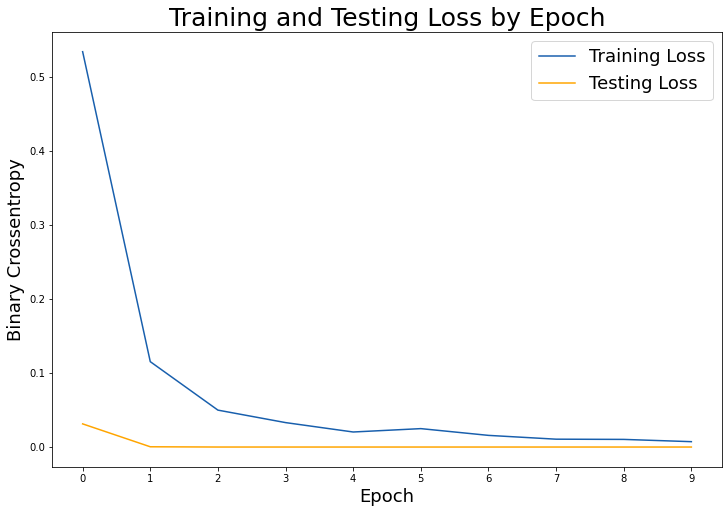

In [ ]:
# Check out our train loss and test loss over epochs.
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='#185fad')
plt.plot(test_loss, label='Testing Loss', color='orange')

# Set title
plt.title('Training and Testing Loss by Epoch', fontsize=25)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Binary Crossentropy', fontsize=18)
plt.xticks(np.arange(10), np.arange(10))

plt.legend(fontsize = 18);

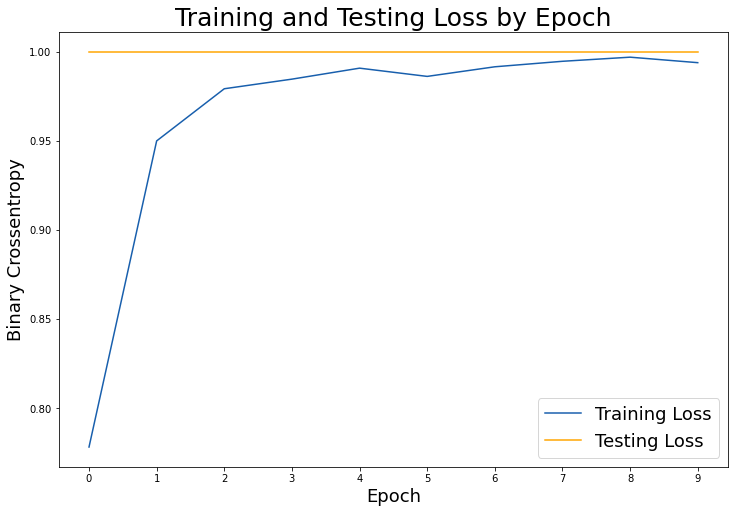

In [ ]:
# Check out our train acc and test acc over epochs.
train_loss = history.history['accuracy']
test_loss = history.history['val_accuracy']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='#185fad')
plt.plot(test_loss, label='Testing Loss', color='orange')

# Set title
plt.title('Training and Testing Loss by Epoch', fontsize=25)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Binary Crossentropy', fontsize=18)
plt.xticks(np.arange(10), np.arange(10))

plt.legend(fontsize = 18);

In [ ]:
cnn_model_2.save('../model/cnn_model_finished')

INFO:tensorflow:Assets written to: ../model/cnn_model_finished\assets


In [3]:
model = tf.keras.models.load_model('../model/cnn_model_finished')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 240, 320, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 120, 160, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 118, 158, 64)      9280      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 59, 79, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 298304)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                19091520  
_________________________________________________________________
dropout (Dropout)            (None, 64)                0

# Transfer Learning

In [ ]:
#loading the validation dataset
IMAGE_SHAPE = (299,299) #required for InceptionV3
data_dir = pathlib.Path('../img/finished_train/')
image_count = len(list(data_dir.glob('*/*.jpg')))
print(f'Image Count = {image_count}')

#setting the list of paths for image files in a dict
images_dict = {
    'pass': list(data_dir.glob('pass/*.jpg')),
    'fail': list(data_dir.glob('fail/*.jpg'))
}

#setting the labels in a dict with integer values (since CNN does not )
labels_dict = {
    'pass': 1,
    'fail': 0,
}

IMAGE_SHAPE = (320,240)

#setting X and y for training
X, y = [], []

for lbl, imgs in images_dict.items():
    for img in imgs:
        img = cv.imread(str(img))
        recolored_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)	#convert from BGR format to RGB format
        resized_img = cv.resize(recolored_img, IMAGE_SHAPE)
        X.append(resized_img)
        y.append(labels_dict[lbl])
        
X = np.array(X)
y = np.array(y)

#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1, stratify=y)

#normalization
X_train_sc = X_train / 255
X_test_sc = X_test / 255

In [ ]:
feature_extractor_model = "https://tfhub.dev/google/imagenet/inception_v3/feature_vector/5"
model = Sequential([
    tfhub.KerasLayer(feature_extractor_model, trainable=False),  # Can be True, see below.
    Dense(1, activation='sigmoid')
    ])

model.build([None, 299, 299, 3])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 2048)              21802784  
_________________________________________________________________
dense (Dense)                (None, 1)                 2049      
Total params: 21,804,833
Trainable params: 2,049
Non-trainable params: 21,802,784
_________________________________________________________________


In [ ]:
# Creating a ModelCheckpoint callback object to save the model according to the value of val_accuracy.
logdir = "../checkpoint/inception_cp_{epoch:04d}.ckpt"
checkpoint = ModelCheckpoint(filepath=logdir,
                            monitor='accuracy',
                            save_best_only=True,
                            save_weights_only=False,
                            verbose=1
                            )

# Compile model
model.compile(loss='binary_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])

In [ ]:
history = model.fit(X_train_sc,
                          y_train,
                          batch_size=64,
                          validation_data=(X_test_sc, y_test),
                          epochs=10,
                          verbose=1,
                          callbacks = checkpoint)

Epoch 1/10
276/276 [==============================] - 736s 3s/step - loss: 0.1697 - accuracy: 0.9495 - val_loss: 0.0656 - val_accuracy: 0.9898

Epoch 00001: accuracy improved from -inf to 0.94951, saving model to ../checkpoint\inception_cp_0001.ckpt
INFO:tensorflow:Assets written to: ../checkpoint\inception_cp_0001.ckpt\assets


INFO:tensorflow:Assets written to: ../checkpoint\inception_cp_0001.ckpt\assets


Epoch 2/10
276/276 [==============================] - 587s 2s/step - loss: 0.0441 - accuracy: 0.9937 - val_loss: 0.0347 - val_accuracy: 0.9934

Epoch 00002: accuracy improved from 0.94951 to 0.99370, saving model to ../checkpoint\inception_cp_0002.ckpt
INFO:tensorflow:Assets written to: ../checkpoint\inception_cp_0002.ckpt\assets


INFO:tensorflow:Assets written to: ../checkpoint\inception_cp_0002.ckpt\assets


Epoch 3/10
276/276 [==============================] - 713s 3s/step - loss: 0.0253 - accuracy: 0.9968 - val_loss: 0.0223 - val_accuracy: 0.9959

Epoch 00003: accuracy improved from 0.99370 to 0.99682, saving model to ../checkpoint\inception_cp_0003.ckpt
INFO:tensorflow:Assets written to: ../checkpoint\inception_cp_0003.ckpt\assets


INFO:tensorflow:Assets written to: ../checkpoint\inception_cp_0003.ckpt\assets


Epoch 4/10
276/276 [==============================] - 937s 3s/step - loss: 0.0172 - accuracy: 0.9981 - val_loss: 0.0161 - val_accuracy: 0.9974

Epoch 00004: accuracy improved from 0.99682 to 0.99813, saving model to ../checkpoint\inception_cp_0004.ckpt
INFO:tensorflow:Assets written to: ../checkpoint\inception_cp_0004.ckpt\assets


INFO:tensorflow:Assets written to: ../checkpoint\inception_cp_0004.ckpt\assets


Epoch 5/10
276/276 [==============================] - 843s 3s/step - loss: 0.0126 - accuracy: 0.9984 - val_loss: 0.0123 - val_accuracy: 0.9985

Epoch 00005: accuracy improved from 0.99813 to 0.99841, saving model to ../checkpoint\inception_cp_0005.ckpt
INFO:tensorflow:Assets written to: ../checkpoint\inception_cp_0005.ckpt\assets


INFO:tensorflow:Assets written to: ../checkpoint\inception_cp_0005.ckpt\assets


Epoch 6/10
276/276 [==============================] - 1123s 4s/step - loss: 0.0098 - accuracy: 0.9988 - val_loss: 0.0097 - val_accuracy: 0.9980

Epoch 00006: accuracy improved from 0.99841 to 0.99875, saving model to ../checkpoint\inception_cp_0006.ckpt
INFO:tensorflow:Assets written to: ../checkpoint\inception_cp_0006.ckpt\assets


INFO:tensorflow:Assets written to: ../checkpoint\inception_cp_0006.ckpt\assets


Epoch 7/10
276/276 [==============================] - 1039s 4s/step - loss: 0.0078 - accuracy: 0.9990 - val_loss: 0.0078 - val_accuracy: 0.9985

Epoch 00007: accuracy improved from 0.99875 to 0.99904, saving model to ../checkpoint\inception_cp_0007.ckpt
INFO:tensorflow:Assets written to: ../checkpoint\inception_cp_0007.ckpt\assets


INFO:tensorflow:Assets written to: ../checkpoint\inception_cp_0007.ckpt\assets


Epoch 8/10
  3/276 [..............................] - ETA: 20:51 - loss: 0.0076 - accuracy: 1.0000

KeyboardInterrupt: 

In [ ]:
checkpoint_best = "../checkpoint/inception_cp_0007.ckpt/"


# Create a new model instance
 #do up to just before you fit.
feature_extractor_model = "https://tfhub.dev/google/imagenet/inception_v3/feature_vector/5"
tf_model = Sequential([
    tfhub.KerasLayer(feature_extractor_model, trainable=False),  # Can be True, see below.
    Dense(1, activation='sigmoid')
    ])

tf_model.build([None, 299, 299, 3])

# Compile model
tf_model.compile(loss='binary_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])

# Load the previously saved weights
tf_model.load_weights(checkpoint_best)

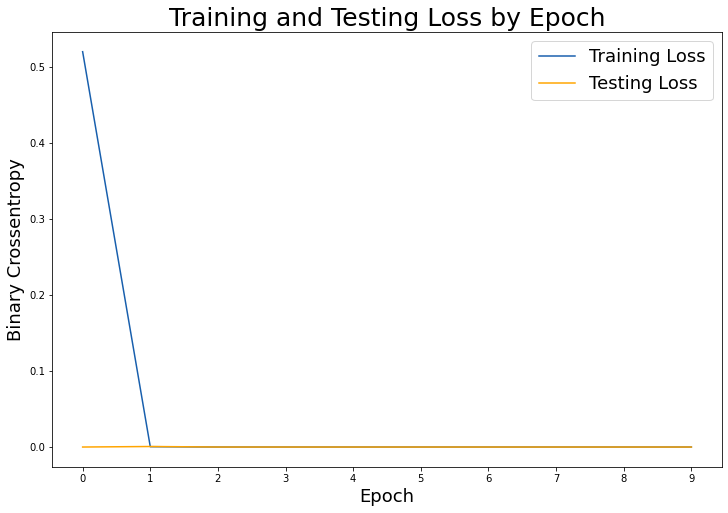

In [ ]:
# Check out our train loss and test loss over epochs.
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='#185fad')
plt.plot(test_loss, label='Testing Loss', color='orange')

# Set title
plt.title('Training and Testing Loss by Epoch', fontsize=25)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Binary Crossentropy', fontsize=18)
plt.xticks(np.arange(10), np.arange(10))

plt.legend(fontsize = 18);

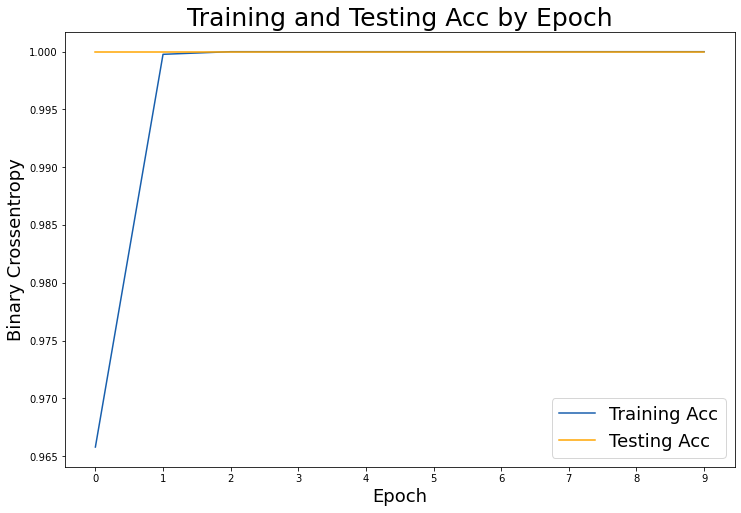

In [ ]:
# Check out our train acc and test acc over epochs.
train_loss = history.history['accuracy']
test_loss = history.history['val_accuracy']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Acc', color='#185fad')
plt.plot(test_loss, label='Testing Acc', color='orange')

# Set title
plt.title('Training and Testing Acc by Epoch', fontsize=25)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Binary Crossentropy', fontsize=18)
plt.xticks(np.arange(10), np.arange(10))

plt.legend(fontsize = 18);

In [ ]:
tf_model.save('../model/cnn_model_finished_tf')

INFO:tensorflow:Assets written to: ../model/cnn_model_finished_w_variation_all_tf\assets


INFO:tensorflow:Assets written to: ../model/cnn_model_finished_w_variation_all_tf\assets


In [ ]:
model = tf.keras.models.load_model('../model/cnn_model_finished_tf')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 2048)              21802784  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2049      
Total params: 21,804,833
Trainable params: 2,049
Non-trainable params: 21,802,784
_________________________________________________________________


# Dataset with 'Pass' and 'Fail' Variability

In [ ]:
#loading the validation dataset
IMAGE_SHAPE = (320,240) #required for InceptionV3
data_dir = pathlib.Path('../img/finished_train_w_variability/')
image_count = len(list(data_dir.glob('*/*.jpg')))
print(f'Image Count = {image_count}')

#setting the list of paths for image files in a dict
images_dict = {
    'pass': list(data_dir.glob('pass/*.jpg')),
    'fail': list(data_dir.glob('fail/*.jpg'))
}

#setting the labels in a dict with integer values (since CNN does not )
labels_dict = {
    'pass': 1,
    'fail': 0,
}

IMAGE_SHAPE = (320,240)

#setting X and y for training
X, y = [], []

for lbl, imgs in images_dict.items():
    for img in imgs:
        img = cv.imread(str(img))
        recolored_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)	#convert from BGR format to RGB format
        resized_img = cv.resize(recolored_img, IMAGE_SHAPE)
        X.append(resized_img)
        y.append(labels_dict[lbl])
        
X = np.array(X)
y = np.array(y)

#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1, stratify=y)

#normalization
X_train_sc = X_train / 255
X_test_sc = X_test / 255

In [ ]:
# Instantiate a CNN.
cnn_model_2 = Sequential()

# Add a convolutional layer.
cnn_model_2.add(Conv2D(filters=16, # number of filters
                       padding='same',
                       kernel_size=(3,3),      # height/width of filter
                       activation='relu',      # activation function 
                       input_shape=(240,320,3))) # shape of input (image)

# Add a pooling layer.
cnn_model_2.add(MaxPooling2D(pool_size=(2,2))) # dimensions of region of pooling

# Add another convolutional layer.
cnn_model_2.add(Conv2D(64,
                       kernel_size=(3,3),
                       activation='relu'))

# Add another pooling layer.
cnn_model_2.add(MaxPooling2D(pool_size=(2,2)))

# Flatten
cnn_model_2.add(Flatten())

# Add a densely-connected layer with 64 neurons.
cnn_model_2.add(Dense(64, activation='relu'))

cnn_model_2.add(Dropout(0.5))

# Add a densely-connected layer with 32 neurons.
cnn_model_2.add(Dense(32, activation='relu'))

cnn_model_2.add(Dropout(0.5))

# Add a final layer 
cnn_model_2.add(Dense(1, activation='sigmoid'))

# Compile model
cnn_model_2.compile(loss='binary_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])

# Fit model on training data
history = cnn_model_2.fit(X_train_sc,
                          y_train,
                          batch_size=64,
                          validation_data=(X_test_sc, y_test),
                          epochs=10,
                          verbose=1)

Epoch 1/10
276/276 [==============================] - 345s 1s/step - loss: 0.1110 - accuracy: 0.9587 - val_loss: 1.7775e-04 - val_accuracy: 1.0000
Epoch 2/10
276/276 [==============================] - 304s 1s/step - loss: 0.0110 - accuracy: 0.9956 - val_loss: 3.4388e-04 - val_accuracy: 1.0000
Epoch 3/10
276/276 [==============================] - 292s 1s/step - loss: 0.0125 - accuracy: 0.9958 - val_loss: 5.6259e-07 - val_accuracy: 1.0000
Epoch 4/10
276/276 [==============================] - 292s 1s/step - loss: 0.0057 - accuracy: 0.9984 - val_loss: 8.7081e-09 - val_accuracy: 1.0000
Epoch 5/10
276/276 [==============================] - 294s 1s/step - loss: 0.0069 - accuracy: 0.9980 - val_loss: 4.3256e-08 - val_accuracy: 1.0000
Epoch 6/10
276/276 [==============================] - 295s 1s/step - loss: 0.0058 - accuracy: 0.9972 - val_loss: 2.0406e-06 - val_accuracy: 1.0000
Epoch 7/10
276/276 [==============================] - 293s 1s/step - loss: 0.0043 - accuracy: 0.9989 - val_loss: 1.991

In [ ]:
cnn_model_2.evaluate(X_test_sc, y_test)

62/62 [==============================] - 7s 109ms/step - loss: 6.5302e-06 - accuracy: 1.0000


[6.530237897095503e-06, 1.0]

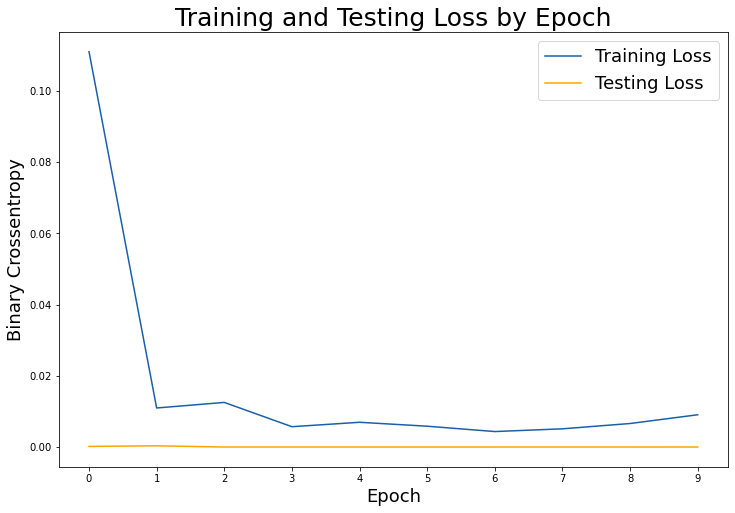

In [ ]:
# Check out our train loss and test loss over epochs.
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='#185fad')
plt.plot(test_loss, label='Testing Loss', color='orange')

# Set title
plt.title('Training and Testing Loss by Epoch', fontsize=25)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Binary Crossentropy', fontsize=18)
plt.xticks(np.arange(10), np.arange(10))

plt.legend(fontsize = 18);

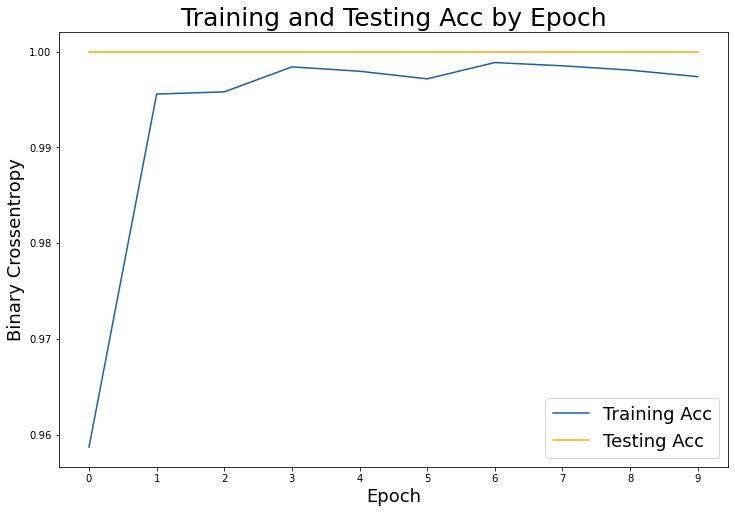

In [ ]:
# Check out our train acc and test acc over epochs.
train_loss = history.history['accuracy']
test_loss = history.history['val_accuracy']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Acc', color='#185fad')
plt.plot(test_loss, label='Testing Acc', color='orange')

# Set title
plt.title('Training and Testing Acc by Epoch', fontsize=25)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Binary Crossentropy', fontsize=18)
plt.xticks(np.arange(10), np.arange(10))

plt.legend(fontsize = 18);

In [ ]:
# Evaluating on validation dataset

# IMAGE_SHAPE = (320,240)
data_dir_val = pathlib.Path('../img/w_variabillity/')
image_count = len(list(data_dir_val.glob('*/*.jpg')))
print(f'Image Count = {image_count}')

images_dict_val = {
    'pass': list(data_dir_val.glob('pass/*.jpg')),
    'fail': list(data_dir_val.glob('fail/*.jpg'))
}

labels_dict = {
    'pass': 1,
    'fail': 0,
}

X_val, y_val = [], []

for lbl, imgs in images_dict_val.items():
    for img in imgs:
        img = cv.imread(str(img))
        recolored_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)	#convert from BGR format to RGB format
        resized_img = cv.resize(recolored_img, IMAGE_SHAPE)
        X_val.append(resized_img)
        y_val.append(labels_dict[lbl])

X_val = np.array(X_val)
y_val = np.array(y_val)

X_val_sc = X_val / 255


Image Count = 3797


In [ ]:
cnn_model_2.evaluate(X_val_sc, y_val)

119/119 [==============================] - 15s 122ms/step - loss: 0.0400 - accuracy: 0.9845


[0.04004882648587227, 0.9844614267349243]

In [ ]:
#saving predictions per image to a Dataframe
results = pd.DataFrame()
IMAGE_SHAPE = (320,240)
for key in labels_dict.keys():
    for i in range(0, len(images_dict_val[str(key)])):
        image = Image.open(images_dict_val[str(key)][i]).resize(IMAGE_SHAPE)
        image = np.array(image) / 255
        new_row = {'Image': images_dict_val[str(key)][i], 'Actual': labels_dict[str(key)], 'Predicted': model.predict(image[np.newaxis, ...])}
        results = results.append(new_row, ignore_index = True)

results.to_csv('../results_after_train_all.csv')

In [ ]:
cnn_model_2.save('../model/cnn_model_finished_w_variation_all')

INFO:tensorflow:Assets written to: ../model/cnn_model_finished_w_variation_all\assets


In [ ]:
model = tf.keras.models.load_model('../model/cnn_model_finished_w_variation_all')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 240, 320, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 120, 160, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 118, 158, 64)      9280      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 59, 79, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 298304)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                19091520  
_________________________________________________________________
dropout (Dropout)            (None, 64)                0

# ROI Dataset Model

In [ ]:
#loading the validation dataset
data_dir = pathlib.Path('../img/crop/')
image_count = len(list(data_dir.glob('*/*.jpg')))
print(f'Image Count = {image_count}')

#setting the list of paths for image files in a dict
images_dict = {
    'pass': list(data_dir.glob('pass/*.jpg')),
    'fail': list(data_dir.glob('fail/*.jpg'))
}

#setting the labels in a dict with integer values (since CNN does not )
labels_dict = {
    'pass': 1,
    'fail': 0,
}

#setting X and y for training
X, y = [], []

for lbl, imgs in images_dict.items():
    for img in imgs:
        img = cv.imread(str(img))
        recolored_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)	#convert from BGR format to RGB format

        #extracting the corner blocks
        cropped_1strow = np.concatenate((recolored_img[101:152, 385:435], recolored_img[101:152, 561:611], recolored_img[101:152, 655:705], recolored_img[101:152, 831:881]), axis = 1)
        cropped_2ndrow = np.concatenate((recolored_img[258:323, 375:425], recolored_img[258:323, 555:605], recolored_img[258:323, 660:710], recolored_img[258:323, 838:888]), axis = 1)
        cropped_3rdrow = np.concatenate((recolored_img[353:417, 370:420], recolored_img[353:417, 550:600], recolored_img[353:417, 664:714], recolored_img[353:417, 845:895]), axis = 1)
        cropped_4throw = np.concatenate((recolored_img[549:619, 356:406], recolored_img[549:619, 550:600], recolored_img[549:619, 664:714], recolored_img[549:619, 856:906]), axis = 1)

        cropped = np.concatenate((cropped_1strow, cropped_2ndrow, cropped_3rdrow, cropped_4throw), axis = 0)
       
        # resized_img = cv.resize(recolored_img, IMAGE_SHAPE)
        X.append(cropped)
        y.append(labels_dict[lbl])
        
X = np.array(X)
y = np.array(y)

#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1, stratify=y)

#normalization
X_train_sc = X_train / 255
X_test_sc = X_test / 255

In [ ]:
# Instantiate a CNN.
cnn_model_2 = Sequential()

# #data_augmentation
# cnn_model_2.add(RandomContrast(0.9, seed = 42))
# cnn_model_2.add(RandomRotation(
#     0.5,
#     fill_mode='constant',
#     interpolation='bilinear',
#     seed=42,
#     fill_value=0.0,
# ))
# cnn_model_2.add(RandomTranslation(
#     height_factor = (-0.3, 0.3), 
#     width_factor = (-0.5, 0.5), 
#     fill_mode='constant',
#     interpolation='bilinear', 
#     seed=42,
#     fill_value=0.0,
# ))

# Add a convolutional layer.
cnn_model_2.add(Conv2D(filters=16, # number of filters
                       padding='same',
                       kernel_size=(3,3),      # height/width of filter
                       activation='relu',      # activation function 
                       input_shape=(250,200,3))) # shape of input (image)

# Add a pooling layer.
cnn_model_2.add(MaxPooling2D(pool_size=(2,2))) # dimensions of region of pooling

# Add another convolutional layer.
cnn_model_2.add(Conv2D(64,
                       kernel_size=(3,3),
                       activation='relu'))

# Add another pooling layer.
cnn_model_2.add(MaxPooling2D(pool_size=(2,2)))

# Flatten
cnn_model_2.add(Flatten())

# Add a densely-connected layer with 64 neurons.
cnn_model_2.add(Dense(64, activation='relu'))

cnn_model_2.add(Dropout(0.5))

# Add a densely-connected layer with 32 neurons.
cnn_model_2.add(Dense(32, activation='relu'))

cnn_model_2.add(Dropout(0.5))

# Add a final layer
cnn_model_2.add(Dense(1, activation='sigmoid'))

# Compile model
cnn_model_2.compile(loss='binary_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])

# Fit model on training data
history = cnn_model_2.fit(X_train_sc,
                          y_train,
                          batch_size=64,
                          validation_data=(X_test_sc, y_test),
                          epochs=10,
                          verbose=1)

Epoch 1/10
64/64 [==============================] - 43s 668ms/step - loss: 0.6911 - accuracy: 0.6905 - val_loss: 0.0801 - val_accuracy: 1.0000
Epoch 2/10
64/64 [==============================] - 42s 663ms/step - loss: 0.1245 - accuracy: 0.9540 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 3/10
64/64 [==============================] - 44s 691ms/step - loss: 0.0610 - accuracy: 0.9855 - val_loss: 2.9676e-04 - val_accuracy: 1.0000
Epoch 4/10
64/64 [==============================] - 44s 688ms/step - loss: 0.0464 - accuracy: 0.9899 - val_loss: 1.7344e-05 - val_accuracy: 1.0000
Epoch 5/10
64/64 [==============================] - 44s 691ms/step - loss: 0.0330 - accuracy: 0.9936 - val_loss: 9.7550e-06 - val_accuracy: 1.0000
Epoch 6/10
64/64 [==============================] - 44s 692ms/step - loss: 0.0271 - accuracy: 0.9948 - val_loss: 1.0400e-06 - val_accuracy: 1.0000
Epoch 7/10
64/64 [==============================] - 44s 692ms/step - loss: 0.0212 - accuracy: 0.9966 - val_loss: 5.0896e-07 - 

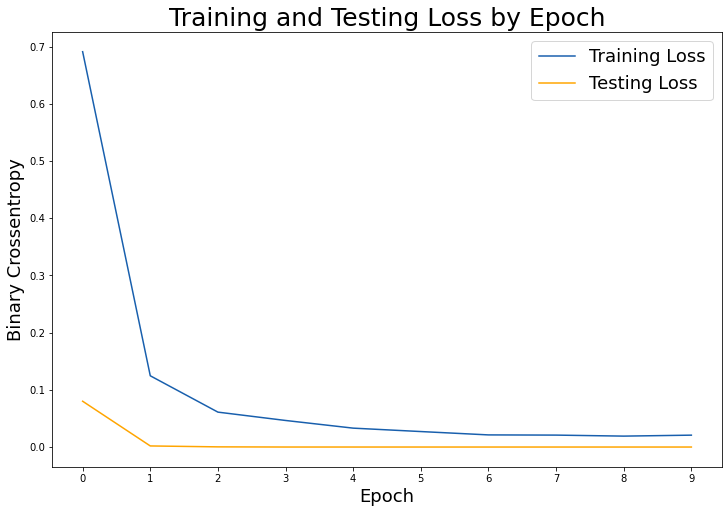

In [ ]:
# Check out our train loss and test loss over epochs.
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='#185fad')
plt.plot(test_loss, label='Testing Loss', color='orange')

# Set title
plt.title('Training and Testing Loss by Epoch', fontsize=25)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Binary Crossentropy', fontsize=18)
plt.xticks(np.arange(10), np.arange(10))

plt.legend(fontsize = 18);

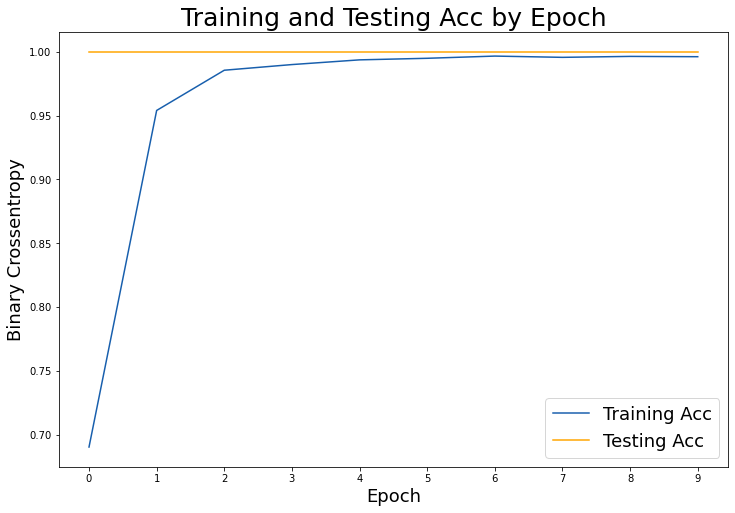

In [ ]:
# Check out our train acc and test acc over epochs.
train_loss = history.history['accuracy']
test_loss = history.history['val_accuracy']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Acc', color='#185fad')
plt.plot(test_loss, label='Testing Acc', color='orange')

# Set title
plt.title('Training and Testing Acc by Epoch', fontsize=25)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Binary Crossentropy', fontsize=18)
plt.xticks(np.arange(10), np.arange(10))

plt.legend(fontsize = 18);

In [ ]:
results = pd.DataFrame()

for key in labels_dict.keys():
    for i in range(0, len(images_dict_val[str(key)])):
        image = Image.open(images_dict_val[str(key)][i])
        image = np.array(image) / 255

        cropped_1strow = np.concatenate((image[101:152, 385:435], image[101:152, 561:611], image[101:152, 655:705], image[101:152, 831:881]), axis = 1)
        cropped_2ndrow = np.concatenate((image[258:323, 375:425], image[258:323, 555:605], image[258:323, 660:710], image[258:323, 838:888]), axis = 1)
        cropped_3rdrow = np.concatenate((image[353:417, 370:420], image[353:417, 550:600], image[353:417, 664:714], image[353:417, 845:895]), axis = 1)
        cropped_4throw = np.concatenate((image[549:619, 356:406], image[549:619, 550:600], image[549:619, 664:714], image[549:619, 856:906]), axis = 1)

        cropped = np.concatenate((cropped_1strow, cropped_2ndrow, cropped_3rdrow, cropped_4throw), axis = 0)

        new_row = {'Image': images_dict_val[str(key)][i], 'Actual': labels_dict[str(key)], 'Predicted': cnn_model_2.predict(cropped[np.newaxis, ...])}
        results = results.append(new_row, ignore_index = True)

results

,Image,Actual,Predicted
0,..\img\w_variabillity\pass\image100.jpg,1.0,[[0.00012014049]]
1,..\img\w_variabillity\pass\image1000.jpg,1.0,[[0.000102772385]]
2,..\img\w_variabillity\pass\image1001.jpg,1.0,[[0.000111281566]]
3,..\img\w_variabillity\pass\image1002.jpg,1.0,[[0.000111281566]]
4,..\img\w_variabillity\pass\image1003.jpg,1.0,[[0.00012191935]]
...,...,...,...
3792,..\img\w_variabillity\fail\fail966.jpg,0.0,[[5.5335625e-09]]
3793,..\img\w_variabillity\fail\fail967.jpg,0.0,[[5.5335625e-09]]
3794,..\img\w_variabillity\fail\fail968.jpg,0.0,[[9.777891e-09]]
3795,..\img\w_variabillity\fail\fail969.jpg,0.0,[[9.777891e-09]]


In [ ]:
results.to_csv('../results_cropped.csv')

In [ ]:
cnn_model_2.save('../model/cnn_model_finished_cropped')

INFO:tensorflow:Assets written to: ../model/cnn_model_finished_cropped\assets


In [ ]:
model = tf.keras.models.load_model('../model/cnn_model_finished_cropped')

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 250, 200, 16)      448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 125, 100, 16)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 123, 98, 64)       9280      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 61, 49, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 191296)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                12243008  
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)               

# Production Model Dataset (Multiclass)

In [ ]:
#loading the validation dataset
data_dir = pathlib.Path('../img/crop/')
image_count = len(list(data_dir.glob('*/*.jpg')))
print(f'Image Count = {image_count}')

#setting the list of paths for image files in a dict
images_dict = {
    'pass': list(data_dir.glob('pass/*.jpg')),
    'fail': list(data_dir.glob('fail/*.jpg')),
    'empty': list(data_dir.glob('empty/*.jpg')),
}

#setting the labels in a dict with integer values (since CNN does not )
labels_dict = {
    'fail': 0,
    'pass': 1,
    'empty': 2,
}

#setting X and y for training
X, y = [], []

for lbl, imgs in images_dict.items():
    for img in imgs:
        img = cv.imread(str(img))
        recolored_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)	#convert from BGR format to RGB format

        #extracting the corner blocks
        cropped_1strow = np.concatenate((recolored_img[101:152, 385:435], recolored_img[101:152, 561:611], recolored_img[101:152, 655:705], recolored_img[101:152, 831:881]), axis = 1)
        cropped_2ndrow = np.concatenate((recolored_img[258:323, 375:425], recolored_img[258:323, 555:605], recolored_img[258:323, 660:710], recolored_img[258:323, 838:888]), axis = 1)
        cropped_3rdrow = np.concatenate((recolored_img[353:417, 370:420], recolored_img[353:417, 550:600], recolored_img[353:417, 664:714], recolored_img[353:417, 845:895]), axis = 1)
        cropped_4throw = np.concatenate((recolored_img[549:619, 356:406], recolored_img[549:619, 550:600], recolored_img[549:619, 664:714], recolored_img[549:619, 856:906]), axis = 1)

        cropped = np.concatenate((cropped_1strow, cropped_2ndrow, cropped_3rdrow, cropped_4throw), axis = 0)
       
        # resized_img = cv.resize(recolored_img, IMAGE_SHAPE)
        X.append(cropped)
        y.append(labels_dict[lbl])
        
X = np.array(X)
y = np.array(y)

#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1, stratify=y)

#normalization
X_train_sc = X_train / 255
X_test_sc = X_test / 255

#One Hot Encoding for y
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)

In [ ]:
# Instantiate a CNN.
cnn_model_2 = Sequential()

# #data_augmentation
# cnn_model_2.add(RandomContrast(0.9, seed = 42))
# cnn_model_2.add(RandomRotation(
#     0.5,
#     fill_mode='constant',
#     interpolation='bilinear',
#     seed=42,
#     fill_value=0.0,
# ))
# cnn_model_2.add(RandomTranslation(
#     height_factor = (-0.3, 0.3), 
#     width_factor = (-0.5, 0.5), 
#     fill_mode='constant',
#     interpolation='bilinear', 
#     seed=42,
#     fill_value=0.0,
# ))

# Add a convolutional layer.
cnn_model_2.add(Conv2D(filters=16, # number of filters
                       padding='same',
                       kernel_size=(3,3),      # height/width of filter
                       activation='relu',      # activation function 
                       input_shape=(250,200,3))) # shape of input (image)

# Add a pooling layer.
cnn_model_2.add(MaxPooling2D(pool_size=(2,2))) # dimensions of region of pooling

# Add another convolutional layer.
cnn_model_2.add(Conv2D(64,
                       kernel_size=(3,3),
                       activation='relu'))

# Add another pooling layer.
cnn_model_2.add(MaxPooling2D(pool_size=(2,2)))

# Flatten
cnn_model_2.add(Flatten())

# Add a densely-connected layer with 64 neurons.
cnn_model_2.add(Dense(64, activation='relu'))

cnn_model_2.add(Dropout(0.5))

# Add a densely-connected layer with 32 neurons.
cnn_model_2.add(Dense(32, activation='relu'))

cnn_model_2.add(Dropout(0.5))

# Add a final layer with 3 neurons.
cnn_model_2.add(Dense(3, activation='softmax'))

# Compile model
cnn_model_2.compile(loss='categorical_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])

# Fit model on training data
history = cnn_model_2.fit(X_train_sc,
                          y_train,
                          batch_size=64,
                          validation_data=(X_test_sc, y_test),
                          epochs=10,
                          verbose=1)

Epoch 1/10
68/68 [==============================] - 47s 681ms/step - loss: 0.7848 - accuracy: 0.7296 - val_loss: 0.0689 - val_accuracy: 1.0000
Epoch 2/10
68/68 [==============================] - 45s 659ms/step - loss: 0.1631 - accuracy: 0.9395 - val_loss: 0.0089 - val_accuracy: 1.0000
Epoch 3/10
68/68 [==============================] - 45s 668ms/step - loss: 0.1072 - accuracy: 0.9636 - val_loss: 0.0032 - val_accuracy: 1.0000
Epoch 4/10
68/68 [==============================] - 45s 667ms/step - loss: 0.0699 - accuracy: 0.9736 - val_loss: 4.8282e-04 - val_accuracy: 1.0000
Epoch 5/10
68/68 [==============================] - 45s 665ms/step - loss: 0.0645 - accuracy: 0.9803 - val_loss: 2.2219e-04 - val_accuracy: 1.0000
Epoch 6/10
68/68 [==============================] - 45s 667ms/step - loss: 0.0428 - accuracy: 0.9861 - val_loss: 8.7567e-06 - val_accuracy: 1.0000
Epoch 7/10
68/68 [==============================] - 45s 666ms/step - loss: 0.0310 - accuracy: 0.9863 - val_loss: 2.1085e-07 - val_

In [ ]:
cnn_model_2.evaluate(X_test_sc, y_test)

15/15 [==============================] - 1s 66ms/step - loss: 3.5548e-06 - accuracy: 1.0000


[3.5548132473195437e-06, 1.0]

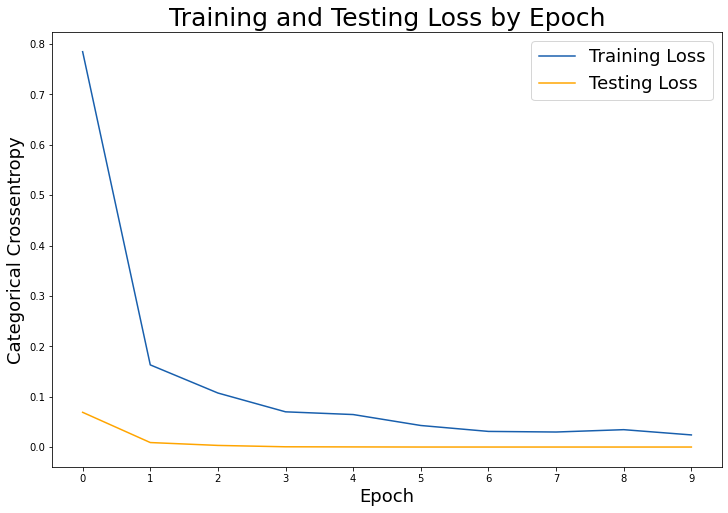

In [ ]:
# Check out our train loss and test loss over epochs.
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='#185fad')
plt.plot(test_loss, label='Testing Loss', color='orange')

# Set title
plt.title('Training and Testing Loss by Epoch', fontsize=25)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Categorical Crossentropy', fontsize=18)
plt.xticks(np.arange(10), np.arange(10))

plt.legend(fontsize = 18);

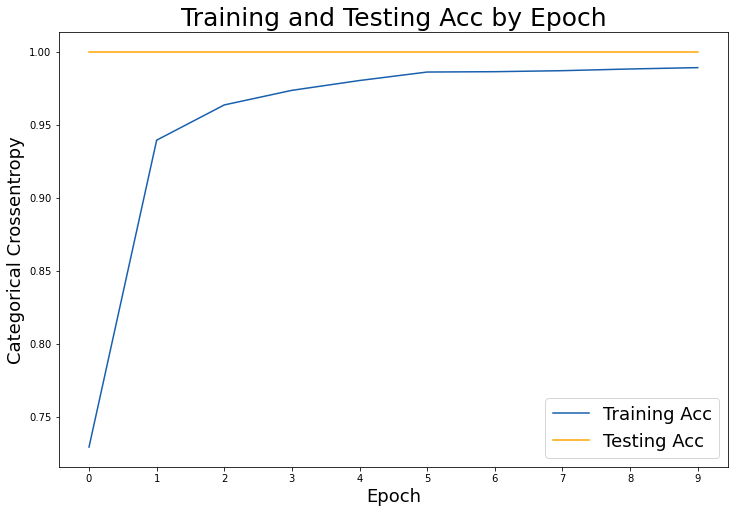

In [ ]:
# Check out our train acc and test acc over epochs.
train_loss = history.history['accuracy']
test_loss = history.history['val_accuracy']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Acc', color='#185fad')
plt.plot(test_loss, label='Testing Acc', color='orange')

# Set title
plt.title('Training and Testing Acc by Epoch', fontsize=25)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Categorical Crossentropy', fontsize=18)
plt.xticks(np.arange(10), np.arange(10))

plt.legend(fontsize = 18);

In [ ]:
cnn_model_2.save('../model/cnn_model_production')

INFO:tensorflow:Assets written to: ../model/cnn_model_production\assets


In [ ]:
model = tf.keras.models.load_model('../model/cnn_model_production')

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 250, 200, 16)      448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 125, 100, 16)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 123, 98, 64)       9280      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 61, 49, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 191296)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                12243008  
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)               